In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.metrics import mean_absolute_error

data = pd.read_excel('DataJunio_19.xlsx') #No preocuparse por el tamaño, pesa 13 megas

In [2]:
data = data[data['TIPO SECTOR'] == 'NO TRADICIONAL']
data

,AÑO,MES,FOB (US$),PESO NETO (KG),NUMERO DE DOCUMENTO,NOMBRE/RAZON SOCIAL,PAIS,SUBPARTIDA,SUBPARTIDA-DESCRIPCION,TIPO SECTOR,SECTOR SUNAT,MACRO SECTOR
0,2018,2019-01-01,110.00,0.182,0000022B,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARCOTICOS,Estados Unidos,4901999000,"4901999000 - LOS DEMÁS LIBROS, FOLLETOS E IMPR...",NO TRADICIONAL,MADERAS Y PAPELES,NO DEFINIDO
1,2018,2019-01-01,1144.74,1.676,0000022B,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARCOTICOS,Estados Unidos,8204110000,8204110000 - LLAVES DE AJUSTE DE MANO DE BOCA ...,NO TRADICIONAL,METAL-MECÁNICO,NO DEFINIDO
2,2018,2019-01-01,3473.00,23.750,0000022B,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARCOTICOS,Estados Unidos,8409100000,"8409100000 - PARTES DE MOTORES DE AVIACIÓN, PA...",NO TRADICIONAL,METAL-MECÁNICO,NO DEFINIDO
3,2018,2019-01-01,810.00,1.052,0000022B,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARCOTICOS,Estados Unidos,8409917000,8409917000 - VÁLVULAS PARA MOTORES DE LA PARTI...,NO TRADICIONAL,METAL-MECÁNICO,NO DEFINIDO
4,2018,2019-01-01,1573.79,2.833,0000022B,EMB. ESTADOS UNIDOS-NAS-ASUNTOS ANTINARCOTICOS,Estados Unidos,8423829090,8423829090 - LOS DEMÁS APARATOS PARA PESAR DE ...,NO TRADICIONAL,METAL-MECÁNICO,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...
206248,2019,2019-06-06,57817.00,190.000,20604687561,CONE TEXTIL S.A.C.,Chile,6204440000,"6204440000 - VESTIDOS, PARA MUJERES O NIÑAS, D...",NO TRADICIONAL,TEXTIL,NO DEFINIDO
206249,2019,2019-06-06,47950.50,130.000,20604710970,INVERSIONES CHANDIA E.I.R.L.,Chile,6204440000,"6204440000 - VESTIDOS, PARA MUJERES O NIÑAS, D...",NO TRADICIONAL,TEXTIL,NO DEFINIDO
206250,2019,2019-06-06,32686.00,140.000,20604710970,INVERSIONES CHANDIA E.I.R.L.,Chile,6206400000,"6206400000 - CAMISAS, BLUSAS Y BLUSAS CAMISERA...",NO TRADICIONAL,TEXTIL,NO DEFINIDO
206251,2019,2019-06-06,184573.00,910.000,20604715670,GRUPO TEXTIL BERROCAL E.I.R.L.,Chile,8308900000,"8308900000 - CIERRES, Y ARTÍCULOS. SIMILARES. ...",NO TRADICIONAL,METAL-MECÁNICO,NO DEFINIDO


In [3]:
data.drop('MACRO SECTOR',axis=1,inplace=True)
data.drop('TIPO SECTOR',axis=1,inplace=True)

In [4]:
data['US$/kg'] = data['FOB (US$)'] / data['PESO NETO (KG)']

In [5]:
data.shape

(198370, 11)

In [6]:
for col in data.columns:
    print('La columna',col,'tiene {} valores unicos'.format(data[col].nunique()))

La columna AÑO tiene 2 valores unicos
La columna MES tiene 6 valores unicos
La columna FOB (US$) tiene 135745 valores unicos
La columna PESO NETO (KG) tiene 114071 valores unicos
La columna NUMERO DE DOCUMENTO tiene 7586 valores unicos
La columna NOMBRE/RAZON SOCIAL tiene 7535 valores unicos
La columna PAIS tiene 174 valores unicos
La columna SUBPARTIDA tiene 4676 valores unicos
La columna SUBPARTIDA-DESCRIPCION tiene 4676 valores unicos
La columna SECTOR SUNAT tiene 11 valores unicos
La columna US$/kg tiene 177014 valores unicos


In [7]:
data.groupby(['NOMBRE/RAZON SOCIAL', 'MES'])[['FOB (US$)','PESO NETO (KG)']].agg('mean')

FOB (US$)  \
NOMBRE/RAZON SOCIAL                                MES                        
6                                                  2019-01-01  10000.000000   
                                                   2019-02-02  28000.000000   
  SERVICIOS GENERALES HUZA & OÑA  E.I.R.L          2019-04-04  86241.210000   
 AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABIL... 2019-01-01   1362.791667   
                                                   2019-03-03   2545.333333   
...                                                                     ...   
ZUBIETA AND PARTNERS E.I.R.L                       2019-06-06   1001.110000   
ZURI SOFT E.I.R.L.                                 2019-01-01   2832.530000   
                                                   2019-03-03   2613.500000   
                                                   2019-04-04   2376.000000   
ÑAPU PERU COLECTION E.I.R.L.                       2019-04-04   7001.500000   

                                                               PESO NETO (KG)  
NOMBRE/RAZON SOCIAL                                MES                         
6                                                  2019-01-01     2570.000000  
                                                   2019-02-02     2200.000000  
  SERVICIOS GENERALES HUZA & OÑA  E.I.R.L          2019-04-04    57826.500000  
 AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABIL... 2019-01-01      160.833333  
                                                   2019-03-03      368.000000  
...                                                                       ...  
ZUBIETA AND PARTNERS E.I.R.L                       2019-06-06       10.925000  
ZURI SOFT E.I.R.L.                                 2019-01-01       46.300000  
                                                   2019-03-03       29.300000  
                                                   2019-04-04       31.300000  
ÑAPU PERU COLECTION E.I.R.L.                       2019-04-04        9.975000  

[22862 rows x 2 columns]

### Primero voy a separar mi train y test... 

In [8]:
# Van desde enero a Junio...
data['MES'].unique()

array(['2019-01-01T00:00:00.000000000', '2019-02-02T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-04T00:00:00.000000000',
       '2019-05-05T00:00:00.000000000', '2019-06-06T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [9]:
data['MES'] = pd.DatetimeIndex(data.MES).month

In [10]:
data.MES.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [11]:
test = data[data['MES'] == 6]

In [12]:
train = data[data['MES'] != 6]

#### ¿Hay valores que estén en test pero no estén en train? 

In [13]:
train.columns

Index(['AÑO', 'MES', 'FOB (US$)', 'PESO NETO (KG)', 'NUMERO DE DOCUMENTO',
       'NOMBRE/RAZON SOCIAL', 'PAIS', 'SUBPARTIDA', 'SUBPARTIDA-DESCRIPCION',
       'SECTOR SUNAT', 'US$/kg'],
      dtype='object')

In [14]:
columnas_a_evaluar = ['NUMERO DE DOCUMENTO','NOMBRE/RAZON SOCIAL','PAIS','SUBPARTIDA','SUBPARTIDA-DESCRIPCION','SECTOR SUNAT']
#SE HALLA QUE EN SECTOR SUNAT NO OCURREN ESTOS CASOS...

In [15]:
subpartida_lista = []
for val_train in [*test['SUBPARTIDA'].unique()]: # De los valos que hay en test
    if val_train not in [*train['SUBPARTIDA'].unique()]: #Cuales no están en train?
        subpartida_lista.append(val_train)
    else:
        pass
print(len(subpartida_lista))
print(data[data['SUBPARTIDA'].isin(subpartida_lista)].shape)
#Al parecer tienen los mismos valores para SUBPARTIDA-DESCRIPCION

163
(188, 11)


In [16]:
#LISTO(dropeado más abajo)
pais_lista = []
for val_train in [*test['PAIS'].unique()]: # De los valos que hay en test
    if val_train not in [*train['PAIS'].unique()]: #Cuales no están en train?
        pais_lista.append(val_train)
    else:
        pass
print(len(pais_lista))
print(data[data['PAIS'].isin(pais_lista)].shape)

3
(12, 11)


In [17]:
#LISTO(dropeado más abajo)
nro_documento_lista = []
for val_train in [*test['NUMERO DE DOCUMENTO'].unique()]: # De los valos que hay en test
    if val_train not in [*train['NUMERO DE DOCUMENTO'].unique()]: #Cuales no están en train?
        nro_documento_lista.append(val_train)
    else:
        pass
print(len(nro_documento_lista))
print(data[data['NUMERO DE DOCUMENTO'].isin(nro_documento_lista)].shape)

406
(1055, 11)


In [18]:
#LISTO(dropeado más abajo)
nombre_razon_social = []
for val_train in [*test['NOMBRE/RAZON SOCIAL'].unique()]: # De los valos que hay en test
    if val_train not in [*train['NOMBRE/RAZON SOCIAL'].unique()]: #Cuales no están en train?
        nombre_razon_social.append(val_train)
    else:
        pass
print(len(nombre_razon_social))
print(data[data['NOMBRE/RAZON SOCIAL'].isin(nombre_razon_social)].shape)

401
(1045, 11)


#### Si bien hay formas de corregir estos casos, al final, eliminaremos las filas con fines prácticos... ¿Por qué? Osea, no tenemos forma de saber cuánto se exportará de tal subpartida si es que no tenemos data pasada de ella... Por eso lo eliminaremos.

In [19]:
# Eliminamos primero este caso, porque es el que contienen más filas...
to_drop = data[data['NUMERO DE DOCUMENTO'].isin(nro_documento_lista)].index
data.drop(to_drop,axis=0,inplace=True)

Aja!!! Tenemos dos casos... En Malawi y Macedonia... Donde el número de documento es -1 (casos a eliminar)

In [20]:
#Ahora evaluaremos pero en otra columna (Es logico que en Nombre/razon social no haya ninguno más)
#Dropeando PAIS
to_drop = data[data['PAIS'].isin(pais_lista)].index
data.drop(to_drop, axis=0, inplace=True)

¿Cuántos números de documento con -1 existen?  -> 182

- En un caso ideal, se debería hacer una dummy y preguntarle al negocio **¿Por qué en estos casos los números de documento son -1?** Si es una respuesta específica se debe **transmitir eso al modelo...** También, se debería de ver si los valores obedecen a un patrón específico (Por ejemplo, todos los que exportan menos de 100kg pueden tener nro de doc -1) 

In [21]:
#Dropeando nro de doc == -1
to_drop = data[data['NUMERO DE DOCUMENTO'] == -1].index
data.drop(to_drop,axis=0,inplace=True)

In [22]:
#Dropeando subpartida
to_drop = data[data['SUBPARTIDA'].isin(subpartida_lista)].index
data.drop(to_drop,axis=0,inplace=True)

In [23]:
data.shape

(196982, 11)

Pequeño feature-engineering para conocer más de la empresa:

Recuerda que la empresa no solamente puede exportar una vez, sino puede hacerlo varias veces en un mes...

In [24]:
cross = pd.crosstab(data['NOMBRE/RAZON SOCIAL'],data['MES'])
cross['suma_fq_exp_en_meses_total'] = cross.iloc[:,:6].sum(axis=1)
cross['suma_fq_exp_para_x_train'] = cross.iloc[:,:4].sum(axis=1)
cross['suma_fq_exp_para_x_test'] = cross.iloc[:,1:5].sum(axis=1)
pd.set_option('display.max_rows', 50)
cross.columns = ['fq_exp_enero','fq_exp_feb','fq_exp_marz','fq_exp_abr','fq_exp_may','fq_exp_jun',
                 'suma_fq_exp_en_meses_total','suma_fq_exp_para_x_train','suma_fq_exp_para_x_test']

In [25]:
#No tendremos de otra para predecir 0 en estos casos. Es sabiduría del negocio saber la periodicidad de sus clientes. 
#Como no poseeemos esa información, no tendremos más que ayudar a nuestro modelo a predecir esos casos que serán 0
cross['dummy_ayuda_train'] = 0
cross.loc[(cross['suma_fq_exp_para_x_train'] == 0) & (cross['fq_exp_may'] > 0),'dummy_ayuda_train'] = 1

In [26]:
cross['dummy_ayuda_test'] = 0
cross.loc[(cross['suma_fq_exp_para_x_test'] == 0) & (cross['fq_exp_jun']>0),'dummy_ayuda_test'] = 1

Cross tiene las frecuencias de registros que hay para cada empresa...

In [27]:
cross

,fq_exp_enero,fq_exp_feb,fq_exp_marz,fq_exp_abr,fq_exp_may,fq_exp_jun,suma_fq_exp_en_meses_total,suma_fq_exp_para_x_train,suma_fq_exp_para_x_test,dummy_ayuda_train,dummy_ayuda_test
NOMBRE/RAZON SOCIAL,,,,,,,,,,,
6,1,1,0,0,0,0,2,2,1,0,0
SERVICIOS GENERALES HUZA & OÑA E.I.R.L,0,0,0,1,0,0,1,1,1,0,0
AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABILIDAD LIMITADA,6,0,3,1,2,3,15,10,6,0,0
COMERCIALIZADORA DE SEMILLAS FORESTALES GÉMULA E.I.R.L.,1,0,0,1,0,0,2,2,1,0,0
COOPERATIVA AGRÍCOLA YAKU FLOR LTDA.,0,0,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
ZOWI PERU SOCIEDAD ANONIMA CERRADA,0,18,11,1,8,13,51,30,38,0,0
ZRII DEL PERU S.A.C.,0,0,0,0,1,1,2,0,1,1,0
ZTE CORPORATION -PERU,1,0,0,3,1,1,6,4,4,0,0


##### Voy a resumir mis periodos en tablas, para luego hacerles merge con esta funcion: ?? DEBERIA?

In [28]:
# Haré un diccionario de cómo quiero resumir estas variables...
ft = {'MES':'nunique', 'FOB (US$)':['max','min','mean','median','var','std','nunique','size','sum'],
     'PESO NETO (KG)':['max','min','median','var','std','mean'],'SECTOR SUNAT':['nunique','size'],
     'SUBPARTIDA':['nunique','size'], 'US$/kg':['max','min','median','var','std','mean']}

data_agrupada_mes_emp = data.groupby(['NOMBRE/RAZON SOCIAL','MES']).agg(ft).reset_index()
#Pondremos de ejemplo a la empresa ZOWI PERU SOCIEDAD ANONIMA CERRADA... 
data_agrupada_mes_emp.columns = ['%s%s' % (a, '_%s' % b if b else '') for a,b in data_agrupada_mes_emp.columns]
data_agrupada_mes_emp[data_agrupada_mes_emp['NOMBRE/RAZON SOCIAL'] == 'ZOWI PERU SOCIEDAD ANONIMA CERRADA']

,NOMBRE/RAZON SOCIAL,MES,MES_nunique,FOB (US$)_max,FOB (US$)_min,FOB (US$)_mean,FOB (US$)_median,FOB (US$)_var,FOB (US$)_std,FOB (US$)_nunique,...,SECTOR SUNAT_nunique,SECTOR SUNAT_size,SUBPARTIDA_nunique,SUBPARTIDA_size,US$/kg_max,US$/kg_min,US$/kg_median,US$/kg_var,US$/kg_std,US$/kg_mean
22433,ZOWI PERU SOCIEDAD ANONIMA CERRADA,2,1,106004.58,60.0,8075.521667,1044.0,6.184587e+08,24868.829751,18,...,2,18,15,18,12.479778,1.364760,2.877063,6.688857,2.586282,3.524783
22434,ZOWI PERU SOCIEDAD ANONIMA CERRADA,3,1,10138.00,360.0,2046.318182,1400.0,7.697301e+06,2774.401037,10,...,2,11,11,11,21.778584,1.666667,2.557319,33.956846,5.827250,4.451710
22435,ZOWI PERU SOCIEDAD ANONIMA CERRADA,4,1,63924.00,63924.0,63924.000000,63924.0,NaN,NaN,1,...,1,1,1,1,2.819732,2.819732,2.819732,NaN,NaN,2.819732
22436,ZOWI PERU SOCIEDAD ANONIMA CERRADA,5,1,7679.50,690.0,3242.187500,2214.5,7.428601e+06,2725.545921,8,...,1,8,8,8,19.174715,0.980887,2.019374,56.921017,7.544602,5.867871
22437,ZOWI PERU SOCIEDAD ANONIMA CERRADA,6,1,8239.00,1.0,1474.653846,900.0,4.489154e+06,2118.762349,12,...,3,13,13,13,21.778584,0.028571,2.999400,30.479051,5.520784,4.872685


In [29]:
pd.set_option('display.max_columns',None)
#Transformaré de manera conveniente la tabla que habíamos creado 
pivot_table = pd.pivot_table(data_agrupada_mes_emp, values=[*data_agrupada_mes_emp.iloc[2:].columns.values],
              index=['NOMBRE/RAZON SOCIAL'], columns = ['MES'])
pivot_table

FOB (US$)_max             \
MES                                                            1          2   
NOMBRE/RAZON SOCIAL                                                           
6                                                       10000.00   28000.00   
  SERVICIOS GENERALES HUZA & OÑA  E.I.R.L                    NaN        NaN   
 AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABIL...       5320.00        NaN   
 COMERCIALIZADORA DE SEMILLAS FORESTALES GÉMULA...      35880.00        NaN   
 COOPERATIVA AGRÍCOLA YAKU FLOR LTDA.                        NaN        NaN   
...                                                          ...        ...   
ZOWI PERU SOCIEDAD ANONIMA CERRADA                           NaN  106004.58   
ZRII DEL PERU S.A.C.                                         NaN        NaN   
ZTE CORPORATION -PERU                                   64694.00        NaN   
ZURI SOFT E.I.R.L.                                       2832.53        NaN   
ÑAPU PERU COLECTION E.I.R.L.                                 NaN        NaN   

                                                                       \
MES                                                       3         4   
NOMBRE/RAZON SOCIAL                                                     
6                                                       NaN       NaN   
  SERVICIOS GENERALES HUZA & OÑA  E.I.R.L               NaN  86241.21   
 AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABIL...   3770.0  16181.00   
 COMERCIALIZADORA DE SEMILLAS FORESTALES GÉMULA...      NaN  14000.00   
 COOPERATIVA AGRÍCOLA YAKU FLOR LTDA.                   NaN   1852.50   
...                                                     ...       ...   
ZOWI PERU SOCIEDAD ANONIMA CERRADA                  10138.0  63924.00   
ZRII DEL PERU S.A.C.                                    NaN       NaN   
ZTE CORPORATION -PERU                                   NaN   7440.25   
ZURI SOFT E.I.R.L.                                   2613.5   2376.00   
ÑAPU PERU COLECTION E.I.R.L.                            NaN   7350.00   

                                                                     \
MES                                                       5       6   
NOMBRE/RAZON SOCIAL                                                   
6                                                       NaN     NaN   
  SERVICIOS GENERALES HUZA & OÑA  E.I.R.L               NaN     NaN   
 AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABIL...  10570.5  7462.5   
 COMERCIALIZADORA DE SEMILLAS FORESTALES GÉMULA...      NaN     NaN   
 COOPERATIVA AGRÍCOLA YAKU FLOR LTDA.                   NaN     NaN   
...                                                     ...     ...   
ZOWI PERU SOCIEDAD ANONIMA CERRADA                   7679.5  8239.0   
ZRII DEL PERU S.A.C.                                 1414.4  2836.8   
ZTE CORPORATION -PERU                                3890.5  3890.5   
ZURI SOFT E.I.R.L.                                      NaN     NaN   
ÑAPU PERU COLECTION E.I.R.L.                            NaN     NaN   

                                                   FOB (US$)_mean  \
MES                                                             1   
NOMBRE/RAZON SOCIAL                                                 
6                                                    10000.000000   
  SERVICIOS GENERALES HUZA & OÑA  E.I.R.L                     NaN   
 AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABIL...    1362.791667   
 COMERCIALIZADORA DE SEMILLAS FORESTALES GÉMULA...   35880.000000   
 COOPERATIVA AGRÍCOLA YAKU FLOR LTDA.                         NaN   
...                                                           ...   
ZOWI PERU SOCIEDAD ANONIMA CERRADA                            NaN   
ZRII DEL PERU S.A.C.                                          NaN   
ZTE CORPORATION -PERU                                64694.000000   
ZURI SOFT E.I.R.L.                                    2832.530000   
ÑAPU PERU COLECTION E.I.R.L. 

In [30]:
pivot_table.columns = ['%s%s' % (b, '_%s' % a if a else '') for a,b in pivot_table.columns]
pivot_table = pivot_table.reset_index()
pivot_table

,NOMBRE/RAZON SOCIAL,1_FOB (US$)_max,2_FOB (US$)_max,3_FOB (US$)_max,4_FOB (US$)_max,5_FOB (US$)_max,6_FOB (US$)_max,1_FOB (US$)_mean,2_FOB (US$)_mean,3_FOB (US$)_mean,4_FOB (US$)_mean,5_FOB (US$)_mean,6_FOB (US$)_mean,1_FOB (US$)_median,2_FOB (US$)_median,3_FOB (US$)_median,4_FOB (US$)_median,5_FOB (US$)_median,6_FOB (US$)_median,1_FOB (US$)_min,2_FOB (US$)_min,3_FOB (US$)_min,4_FOB (US$)_min,5_FOB (US$)_min,6_FOB (US$)_min,1_FOB (US$)_nunique,2_FOB (US$)_nunique,3_FOB (US$)_nunique,4_FOB (US$)_nunique,5_FOB (US$)_nunique,6_FOB (US$)_nunique,1_FOB (US$)_size,2_FOB (US$)_size,3_FOB (US$)_size,4_FOB (US$)_size,5_FOB (US$)_size,6_FOB (US$)_size,1_FOB (US$)_std,2_FOB (US$)_std,3_FOB (US$)_std,4_FOB (US$)_std,5_FOB (US$)_std,6_FOB (US$)_std,1_FOB (US$)_sum,2_FOB (US$)_sum,3_FOB (US$)_sum,4_FOB (US$)_sum,5_FOB (US$)_sum,6_FOB (US$)_sum,1_FOB (US$)_var,2_FOB (US$)_var,3_FOB (US$)_var,4_FOB (US$)_var,5_FOB (US$)_var,6_FOB (US$)_var,1_MES_nunique,2_MES_nunique,3_MES_nunique,4_MES_nunique,5_MES_nunique,6_MES_nunique,1_PESO NETO (KG)_max,2_PESO NETO (KG)_max,3_PESO NETO (KG)_max,4_PESO NETO (KG)_max,5_PESO NETO (KG)_max,6_PESO NETO (KG)_max,1_PESO NETO (KG)_mean,2_PESO NETO (KG)_mean,3_PESO NETO (KG)_mean,4_PESO NETO (KG)_mean,5_PESO NETO (KG)_mean,6_PESO NETO (KG)_mean,1_PESO NETO (KG)_median,2_PESO NETO (KG)_median,3_PESO NETO (KG)_median,4_PESO NETO (KG)_median,5_PESO NETO (KG)_median,6_PESO NETO (KG)_median,1_PESO NETO (KG)_min,2_PESO NETO (KG)_min,3_PESO NETO (KG)_min,4_PESO NETO (KG)_min,5_PESO NETO (KG)_min,6_PESO NETO (KG)_min,1_PESO NETO (KG)_std,2_PESO NETO (KG)_std,3_PESO NETO (KG)_std,4_PESO NETO (KG)_std,5_PESO NETO (KG)_std,6_PESO NETO (KG)_std,1_PESO NETO (KG)_var,2_PESO NETO (KG)_var,3_PESO NETO (KG)_var,4_PESO NETO (KG)_var,5_PESO NETO (KG)_var,6_PESO NETO (KG)_var,1_SECTOR SUNAT_nunique,2_SECTOR SUNAT_nunique,3_SECTOR SUNAT_nunique,4_SECTOR SUNAT_nunique,5_SECTOR SUNAT_nunique,6_SECTOR SUNAT_nunique,1_SECTOR SUNAT_size,2_SECTOR SUNAT_size,3_SECTOR SUNAT_size,4_SECTOR SUNAT_size,5_SECTOR SUNAT_size,6_SECTOR SUNAT_size,1_SUBPARTIDA_nunique,2_SUBPARTIDA_nunique,3_SUBPARTIDA_nunique,4_SUBPARTIDA_nunique,5_SUBPARTIDA_nunique,6_SUBPARTIDA_nunique,1_SUBPARTIDA_size,2_SUBPARTIDA_size,3_SUBPARTIDA_size,4_SUBPARTIDA_size,5_SUBPARTIDA_size,6_SUBPARTIDA_size,1_US$/kg_max,2_US$/kg_max,3_US$/kg_max,4_US$/kg_max,5_US$/kg_max,6_US$/kg_max,1_US$/kg_mean,2_US$/kg_mean,3_US$/kg_mean,4_US$/kg_mean,5_US$/kg_mean,6_US$/kg_mean,1_US$/kg_median,2_US$/kg_median,3_US$/kg_median,4_US$/kg_median,5_US$/kg_median,6_US$/kg_median,1_US$/kg_min,2_US$/kg_min,3_US$/kg_min,4_US$/kg_min,5_US$/kg_min,6_US$/kg_min,1_US$/kg_std,2_US$/kg_std,3_US$/kg_std,4_US$/kg_std,5_US$/kg_std,6_US$/kg_std,1_US$/kg_var,2_US$/kg_var,3_US$/kg_var,4_US$/kg_var,5_US$/kg_var,6_US$/kg_var
0,6,10000.00,28000.00,NaN,NaN,NaN,NaN,10000.000000,28000.000000,NaN,NaN,NaN,NaN,10000.00,28000.0,NaN,NaN,NaN,NaN,10000.00,28000.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.00,28000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2570.000,2200.00,NaN,NaN,NaN,NaN,2570.000000,2200.000,NaN,NaN,NaN,NaN,2570.0000,2200.000,NaN,NaN,NaN,NaN,2570.000,2200.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,3.891051,12.727273,NaN,NaN,NaN,NaN,3.891051,12.727273,NaN,NaN,NaN,NaN,3.891051,12.727273,NaN,NaN,NaN,NaN,3.891051,12.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SERVICIOS GENERALES HUZA & OÑA E.I.R.L,NaN,NaN,NaN,86241.21,NaN,NaN,NaN,NaN,NaN,86241.21,NaN,NaN,NaN,NaN,NaN,86241.21,NaN,NaN,NaN,NaN,NaN,86241.21,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86241.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,57826.500,NaN,NaN,NaN,NaN,NaN,57826.500000,NaN,NaN,NaN,NaN,NaN,57826.500,NaN,NaN,NaN,NaN,NaN,57826.500,NaN,NaN,NaN,NaN,NaN,Na

Ahora, llenaremos los nulos con 0 porque se entiende de que son cero al no tener data o solamente 1 valor... **VAMOS A VER QUË TAL LE VA AL ALGORITMO** 

- NOTA: **SE DEBERIA AGREGAR AUTO-CORRELACIONES CON LOS PERIODOS PASADOS**

In [31]:
for col in pivot_table.columns:
    pivot_table[col].fillna(0,inplace=True)

## Vamos a hacer el train y test

In [32]:
cols_train = [col for col in pivot_table.columns if col.startswith(('1','2','3','4'))]
cols_train.append('NOMBRE/RAZON SOCIAL')

In [33]:
cols_test = [col for col in pivot_table.columns if col.startswith(('2','3','4','5'))]
cols_test.append('NOMBRE/RAZON SOCIAL')

In [34]:
X_train = pivot_table[cols_train]
y_train = pivot_table['5_US$/kg_mean']
cols_train.append('5_US$/kg_mean')
x_train = pivot_table[cols_train]

In [35]:
X_test = pivot_table[cols_test]
y_test = pivot_table['6_US$/kg_mean']
cols_test.append('6_US$/kg_mean')
x_test = pivot_table[cols_test]

In [36]:
(y_train - X_test['5_US$/kg_mean']).value_counts()

0.0    7133
Name: 5_US$/kg_mean, dtype: int64

In [37]:
(x_train['5_US$/kg_mean'] - x_test['5_US$/kg_mean']).value_counts()

0.0    7133
Name: 5_US$/kg_mean, dtype: int64

Pero aún falta:

- Agregar la data de cross.
- Estandarizar el nombre de las columnas para x_train y x_test. Así como para el target

In [38]:
cross = cross.reset_index()

In [39]:
cross_train = cross[['NOMBRE/RAZON SOCIAL','fq_exp_enero','fq_exp_feb','fq_exp_marz','fq_exp_abr','dummy_ayuda_train',
      'suma_fq_exp_para_x_train']]
cross_test = cross[['NOMBRE/RAZON SOCIAL','fq_exp_feb','fq_exp_marz','fq_exp_abr','fq_exp_may','dummy_ayuda_test',
      'suma_fq_exp_para_x_test']]

In [40]:
print(X_train.shape,X_test.shape)

(7133, 105) (7133, 105)


In [41]:
cross_train

,NOMBRE/RAZON SOCIAL,fq_exp_enero,fq_exp_feb,fq_exp_marz,fq_exp_abr,dummy_ayuda_train,suma_fq_exp_para_x_train
0,6,1,1,0,0,0,2
1,SERVICIOS GENERALES HUZA & OÑA E.I.R.L,0,0,0,1,0,1
2,AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABI...,6,0,3,1,0,10
3,COMERCIALIZADORA DE SEMILLAS FORESTALES GÉMUL...,1,0,0,1,0,2
4,COOPERATIVA AGRÍCOLA YAKU FLOR LTDA.,0,0,0,1,0,1
...,...,...,...,...,...,...,...
7128,ZOWI PERU SOCIEDAD ANONIMA CERRADA,0,18,11,1,0,30
7129,ZRII DEL PERU S.A.C.,0,0,0,0,1,0
7130,ZTE CORPORATION -PERU,1,0,0,3,0,4
7131,ZURI SOFT E.I.R.L.,1,0,1,1,0,3


In [42]:
cross_test

,NOMBRE/RAZON SOCIAL,fq_exp_feb,fq_exp_marz,fq_exp_abr,fq_exp_may,dummy_ayuda_test,suma_fq_exp_para_x_test
0,6,1,0,0,0,0,1
1,SERVICIOS GENERALES HUZA & OÑA E.I.R.L,0,0,1,0,0,1
2,AQUINO Y CIA SOCIEDAD COMERCIAL DE RESPONSABI...,0,3,1,2,0,6
3,COMERCIALIZADORA DE SEMILLAS FORESTALES GÉMUL...,0,0,1,0,0,1
4,COOPERATIVA AGRÍCOLA YAKU FLOR LTDA.,0,0,1,0,0,1
...,...,...,...,...,...,...,...
7128,ZOWI PERU SOCIEDAD ANONIMA CERRADA,18,11,1,8,0,38
7129,ZRII DEL PERU S.A.C.,0,0,0,1,0,1
7130,ZTE CORPORATION -PERU,0,0,3,1,0,4
7131,ZURI SOFT E.I.R.L.,0,1,1,0,0,2


In [43]:
X_train = X_train.join(cross_train.set_index('NOMBRE/RAZON SOCIAL'), on='NOMBRE/RAZON SOCIAL')
X_test = X_test.join(cross_test.set_index('NOMBRE/RAZON SOCIAL'), on='NOMBRE/RAZON SOCIAL')

In [44]:
print(X_train.shape,X_test.shape)

(7133, 111) (7133, 111)


In [45]:
(y_train - X_test['5_US$/kg_mean']).value_counts()

0.0    7133
Name: 5_US$/kg_mean, dtype: int64

In [46]:
print(X_train.columns)
print(X_test.columns)

#Voy a estandarizar mis columnas entonces

X_test.columns = X_train.columns

Index(['1_FOB (US$)_max', '2_FOB (US$)_max', '3_FOB (US$)_max',
       '4_FOB (US$)_max', '1_FOB (US$)_mean', '2_FOB (US$)_mean',
       '3_FOB (US$)_mean', '4_FOB (US$)_mean', '1_FOB (US$)_median',
       '2_FOB (US$)_median',
       ...
       '2_US$/kg_var', '3_US$/kg_var', '4_US$/kg_var', 'NOMBRE/RAZON SOCIAL',
       'fq_exp_enero', 'fq_exp_feb', 'fq_exp_marz', 'fq_exp_abr',
       'dummy_ayuda_train', 'suma_fq_exp_para_x_train'],
      dtype='object', length=111)
Index(['2_FOB (US$)_max', '3_FOB (US$)_max', '4_FOB (US$)_max',
       '5_FOB (US$)_max', '2_FOB (US$)_mean', '3_FOB (US$)_mean',
       '4_FOB (US$)_mean', '5_FOB (US$)_mean', '2_FOB (US$)_median',
       '3_FOB (US$)_median',
       ...
       '3_US$/kg_var', '4_US$/kg_var', '5_US$/kg_var', 'NOMBRE/RAZON SOCIAL',
       'fq_exp_feb', 'fq_exp_marz', 'fq_exp_abr', 'fq_exp_may',
       'dummy_ayuda_test', 'suma_fq_exp_para_x_test'],
      dtype='object', length=111)


In [47]:
(y_train - X_test['4_US$/kg_mean']).value_counts()

0.0    7133
dtype: int64

In [48]:
# Vamos a hacerle feature encoding a la columna del nombre de las empresas... 
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [49]:
temp_trn, temp_sub = target_encode(X_train['NOMBRE/RAZON SOCIAL'],
                                  X_test['NOMBRE/RAZON SOCIAL'],
                                  target = y_train,
                                  min_samples_leaf = 15,
                                  smoothing = 2,
                                  noise_level = 0.01)
X_train['NOMBRE/RAZON SOCIAL'] = temp_trn
X_test['NOMBRE/RAZON SOCIAL'] = temp_sub

Veremos a los outliers con el coeficiente de Kurtosis... trataremos de reducirlo

In [50]:
(np.log1p(y_train) - X_test['4_US$/kg_mean']).value_counts()

 0.000000     3220
-0.004690       10
-0.017678        9
-0.306853        8
-1.613706        5
              ... 
-76.061471       1
-5.653024        1
-42.658694       1
-44.240213       1
-1.125210        1
Length: 3828, dtype: int64

In [51]:
(np.log1p(y_train) - X_test['4_US$/kg_mean']).value_counts()

 0.000000     3220
-0.004690       10
-0.017678        9
-0.306853        8
-1.613706        5
              ... 
-76.061471       1
-5.653024        1
-42.658694       1
-44.240213       1
-1.125210        1
Length: 3828, dtype: int64

In [52]:
pd.set_option('display.max_rows',112) #Abro para desplegar todo
X_train.kurtosis().sort_values()

1_MES_nunique                 -1.997505
2_MES_nunique                 -1.996285
4_MES_nunique                 -1.968788
3_MES_nunique                 -1.957130
dummy_ayuda_train              6.716999
4_SECTOR SUNAT_nunique         9.934917
3_SECTOR SUNAT_nunique        10.412638
2_SECTOR SUNAT_nunique        12.117272
1_SECTOR SUNAT_nunique        12.233550
2_SUBPARTIDA_nunique         136.661699
4_SUBPARTIDA_nunique         149.473046
1_SUBPARTIDA_nunique         175.802624
1_FOB (US$)_sum              265.715125
2_FOB (US$)_max              270.230549
1_FOB (US$)_std              387.379813
3_SUBPARTIDA_nunique         391.560897
3_FOB (US$)_max              412.127956
1_FOB (US$)_mean             428.248625
2_FOB (US$)_std              438.667549
1_FOB (US$)_max              456.744504
3_FOB (US$)_sum              467.652294
2_FOB (US$)_sum              467.746501
4_FOB (US$)_max              480.038468
4_FOB (US$)_sum              502.443457
3_FOB (US$)_std              523.739786


In [53]:
X_test.kurtosis().sort_values()
pd.set_option('display.max_rows',40) #Cierro el despliegue

In [54]:
to_drop_test = [*y_test[y_test > 20000].index]
to_drop_train = [*y_train[y_train > 20000].index]

In [55]:
for elem in to_drop_train:
    to_drop_test.append(elem)
to_drop_test

[2287, 4191, 6608, 575, 1047, 1842, 2287, 6608]

In [56]:
X_train.drop(to_drop_test,axis=0,inplace=True)
X_test.drop(to_drop_test, axis=0,inplace=True)
y_train.drop(to_drop_test,inplace=True)
y_test.drop(to_drop_test,inplace=True)

In [57]:
(y_train - X_test['4_US$/kg_mean']).value_counts()

0.0    7127
dtype: int64

In [58]:
# Vamos a sacarle logaritmos a todos
cols_to_log = [col for col in X_train.columns if col.startswith(('1','2','3','4','5'))]
cols_to_log = [col for col in cols_to_log if not 'unique' in col and 'size' not in col]

In [59]:
#for col in cols_to_log:
#    X_train[col] = np.log1p(X_train[col])
#    X_test[col] = np.log1p(X_test[col])

In [60]:
(y_train - X_test['4_US$/kg_mean']).value_counts()

0.0    7127
dtype: int64

In [61]:
# A lo mejor tendremos que encodear denuevo (baja la kurtosis)
temp_trn, temp_sub = target_encode(X_train['NOMBRE/RAZON SOCIAL'],
                                  X_test['NOMBRE/RAZON SOCIAL'],
                                  target = y_train,
                                  min_samples_leaf = 15,
                                  smoothing = 2,
                                  noise_level = 0.01)
X_train['NOMBRE/RAZON SOCIAL'] = temp_trn
X_test['NOMBRE/RAZON SOCIAL'] = temp_sub

Viendo autocorrelaciones y botando multicolinealidad 

In [62]:
# Solo vermeos en la data continua (que sera la que está dentro de cols_to_log)
pd.set_option('display.max_rows',None)
X_train[cols_to_log].corr().abs().unstack().sort_values()

2_US$/kg_var             3_PESO NETO (KG)_mean      0.000012
3_PESO NETO (KG)_mean    2_US$/kg_var               0.000012
4_PESO NETO (KG)_min     2_PESO NETO (KG)_var       0.000020
2_PESO NETO (KG)_var     4_PESO NETO (KG)_min       0.000020
3_FOB (US$)_sum          3_US$/kg_min               0.000042
3_US$/kg_min             3_FOB (US$)_sum            0.000042
2_PESO NETO (KG)_min     3_PESO NETO (KG)_var       0.000047
3_PESO NETO (KG)_var     2_PESO NETO (KG)_min       0.000047
2_FOB (US$)_median       4_US$/kg_median            0.000056
4_US$/kg_median          2_FOB (US$)_median         0.000056
2_US$/kg_std             3_FOB (US$)_median         0.000060
3_FOB (US$)_median       2_US$/kg_std               0.000060
2_PESO NETO (KG)_mean    3_US$/kg_mean              0.000065
3_US$/kg_mean            2_PESO NETO (KG)_mean      0.000065
                         1_PESO NETO (KG)_mean      0.000066
1_PESO NETO (KG)_mean    3_US$/kg_mean              0.000066
2_US$/kg_var            

In [63]:
pd.set_option('display.max_rows',40) #Cierro el despliegue

In [181]:
# Vamos a dropear la mediana y la varianza de nuestro modelo? ... Haremos que eso lo decida nuestro primer modelo... 
# Por ahora solo dropearemos la std

cols_final = [col for col in cols_to_log if not 'std' in col]

Seleccionando nuestro modelo:

- Haremos un LightGBM dado que es el más rápido (se probó Random Forest pero demora mucho). En estos casos, es poca data. Y se recomendaría un random forest o un modelo más simple. Sin embargo, como se ha alcanzado a una métrica aceptable, se ha procedido a dejarlo en ese estado. 


In [234]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

### Voy a tunear los hiperparámetros en la nube.. 

In [182]:
cat_ind = ['1_SECTOR SUNAT_nunique',
 '2_SECTOR SUNAT_nunique',
 '3_SECTOR SUNAT_nunique',
 '4_SECTOR SUNAT_nunique',
 '1_SECTOR SUNAT_size',
 '2_SECTOR SUNAT_size',
 '3_SECTOR SUNAT_size',
 '4_SECTOR SUNAT_size','fq_exp_enero',
 'fq_exp_feb',
 'fq_exp_marz',
 'fq_exp_abr']

In [183]:
cat_index = [X_train.columns.get_loc(col) for col in cat_ind if col in X_train]

In [185]:
from lightgbm import LGBMRegressor

params_lgb = {
    'boosting_type':'dart',
    'learning_rate': 0.01,
    'n_estimators':1200,
    'max_depth': -1
}
lgb_reg = LGBMRegressor(**params_lgb, n_jobs=-1, random_state=123)
lgb_reg.fit(X_train, y_train, eval_set=(X_test,y_test), eval_metric='mae')

[1]	valid_0's l1: 69.7634	valid_0's l2: 186184
[2]	valid_0's l1: 69.3856	valid_0's l2: 185996
[3]	valid_0's l1: 69.0173	valid_0's l2: 185810
[4]	valid_0's l1: 68.6518	valid_0's l2: 185629
[5]	valid_0's l1: 68.6556	valid_0's l2: 185631
[6]	valid_0's l1: 55.5366	valid_0's l2: 185496
[7]	valid_0's l1: 55.3112	valid_0's l2: 185324
[8]	valid_0's l1: 55.3112	valid_0's l2: 185324
[9]	valid_0's l1: 55.0906	valid_0's l2: 185155
[10]	valid_0's l1: 54.8679	valid_0's l2: 185052
[11]	valid_0's l1: 54.6476	valid_0's l2: 184887
[12]	valid_0's l1: 54.7077	valid_0's l2: 184915
[13]	valid_0's l1: 54.4868	valid_0's l2: 184816
[14]	valid_0's l1: 54.2737	valid_0's l2: 184654
[15]	valid_0's l1: 54.3484	valid_0's l2: 184687
[16]	valid_0's l1: 54.1339	valid_0's l2: 184589
[17]	valid_0's l1: 54.2076	valid_0's l2: 184623
[18]	valid_0's l1: 53.994	valid_0's l2: 184527
[19]	valid_0's l1: 53.7882	valid_0's l2: 184366
[20]	valid_0's l1: 53.5814	valid_0's l2: 184208
[21]	valid_0's l1: 53.3755	valid_0's l2: 184116
[2

[174]	valid_0's l1: 36.8979	valid_0's l2: 180344
[175]	valid_0's l1: 36.9168	valid_0's l2: 180392
[176]	valid_0's l1: 36.9437	valid_0's l2: 180435
[177]	valid_0's l1: 36.9182	valid_0's l2: 180381
[178]	valid_0's l1: 36.8922	valid_0's l2: 180324
[179]	valid_0's l1: 36.8713	valid_0's l2: 180226
[180]	valid_0's l1: 36.8923	valid_0's l2: 180270
[181]	valid_0's l1: 36.9057	valid_0's l2: 180301
[182]	valid_0's l1: 36.9295	valid_0's l2: 180347
[183]	valid_0's l1: 36.9536	valid_0's l2: 180379
[184]	valid_0's l1: 36.928	valid_0's l2: 180282
[185]	valid_0's l1: 36.9043	valid_0's l2: 180229
[186]	valid_0's l1: 36.9245	valid_0's l2: 180272
[187]	valid_0's l1: 36.9048	valid_0's l2: 180166
[188]	valid_0's l1: 36.9291	valid_0's l2: 180212
[189]	valid_0's l1: 36.9035	valid_0's l2: 180116
[190]	valid_0's l1: 36.8802	valid_0's l2: 180062
[191]	valid_0's l1: 36.9006	valid_0's l2: 180105
[192]	valid_0's l1: 36.9186	valid_0's l2: 180143
[193]	valid_0's l1: 36.8967	valid_0's l2: 180044
[194]	valid_0's l1: 3

[344]	valid_0's l1: 35.5064	valid_0's l2: 177723
[345]	valid_0's l1: 35.5033	valid_0's l2: 177656
[346]	valid_0's l1: 35.5122	valid_0's l2: 177595
[347]	valid_0's l1: 35.5176	valid_0's l2: 177633
[348]	valid_0's l1: 35.5234	valid_0's l2: 177670
[349]	valid_0's l1: 35.5241	valid_0's l2: 177613
[350]	valid_0's l1: 35.5288	valid_0's l2: 177651
[351]	valid_0's l1: 35.5338	valid_0's l2: 177690
[352]	valid_0's l1: 35.5295	valid_0's l2: 177622
[353]	valid_0's l1: 35.5234	valid_0's l2: 177568
[354]	valid_0's l1: 35.5306	valid_0's l2: 177601
[355]	valid_0's l1: 35.5245	valid_0's l2: 177545
[356]	valid_0's l1: 35.5297	valid_0's l2: 177477
[357]	valid_0's l1: 35.535	valid_0's l2: 177512
[358]	valid_0's l1: 35.5417	valid_0's l2: 177546
[359]	valid_0's l1: 35.5493	valid_0's l2: 177581
[360]	valid_0's l1: 35.5534	valid_0's l2: 177623
[361]	valid_0's l1: 35.555	valid_0's l2: 177567
[362]	valid_0's l1: 35.546	valid_0's l2: 177507
[363]	valid_0's l1: 35.5458	valid_0's l2: 177442
[364]	valid_0's l1: 35.

[512]	valid_0's l1: 35.3203	valid_0's l2: 173804
[513]	valid_0's l1: 35.3196	valid_0's l2: 173830
[514]	valid_0's l1: 35.3234	valid_0's l2: 173783
[515]	valid_0's l1: 35.3236	valid_0's l2: 173828
[516]	valid_0's l1: 35.3227	valid_0's l2: 173864
[517]	valid_0's l1: 35.3278	valid_0's l2: 173822
[518]	valid_0's l1: 35.3345	valid_0's l2: 173776
[519]	valid_0's l1: 35.3373	valid_0's l2: 173730
[520]	valid_0's l1: 35.3524	valid_0's l2: 173314
[521]	valid_0's l1: 35.3522	valid_0's l2: 173360
[522]	valid_0's l1: 35.358	valid_0's l2: 173336
[523]	valid_0's l1: 35.3697	valid_0's l2: 173313
[524]	valid_0's l1: 35.3689	valid_0's l2: 173363
[525]	valid_0's l1: 35.3675	valid_0's l2: 173420
[526]	valid_0's l1: 35.3672	valid_0's l2: 173451
[527]	valid_0's l1: 35.3692	valid_0's l2: 173485
[528]	valid_0's l1: 35.3744	valid_0's l2: 173438
[529]	valid_0's l1: 35.3739	valid_0's l2: 173474
[530]	valid_0's l1: 35.3762	valid_0's l2: 173508
[531]	valid_0's l1: 35.375	valid_0's l2: 173569
[532]	valid_0's l1: 35

[680]	valid_0's l1: 35.3155	valid_0's l2: 170983
[681]	valid_0's l1: 35.3282	valid_0's l2: 170992
[682]	valid_0's l1: 35.3337	valid_0's l2: 170580
[683]	valid_0's l1: 35.3664	valid_0's l2: 170231
[684]	valid_0's l1: 35.3699	valid_0's l2: 170208
[685]	valid_0's l1: 35.3744	valid_0's l2: 169807
[686]	valid_0's l1: 35.3731	valid_0's l2: 169834
[687]	valid_0's l1: 35.4051	valid_0's l2: 169495
[688]	valid_0's l1: 35.4121	valid_0's l2: 169472
[689]	valid_0's l1: 35.4125	valid_0's l2: 169489
[690]	valid_0's l1: 35.4111	valid_0's l2: 169518
[691]	valid_0's l1: 35.4183	valid_0's l2: 169495
[692]	valid_0's l1: 35.4192	valid_0's l2: 169515
[693]	valid_0's l1: 35.4169	valid_0's l2: 169549
[694]	valid_0's l1: 35.4246	valid_0's l2: 169530
[695]	valid_0's l1: 35.4616	valid_0's l2: 169199
[696]	valid_0's l1: 35.4605	valid_0's l2: 169222
[697]	valid_0's l1: 35.4729	valid_0's l2: 168837
[698]	valid_0's l1: 35.4747	valid_0's l2: 168818
[699]	valid_0's l1: 35.4733	valid_0's l2: 168844
[700]	valid_0's l1: 

[849]	valid_0's l1: 36.3911	valid_0's l2: 162300
[850]	valid_0's l1: 36.3877	valid_0's l2: 162321
[851]	valid_0's l1: 36.4131	valid_0's l2: 162037
[852]	valid_0's l1: 36.419	valid_0's l2: 162068
[853]	valid_0's l1: 36.4682	valid_0's l2: 161824
[854]	valid_0's l1: 36.4604	valid_0's l2: 161869
[855]	valid_0's l1: 36.4507	valid_0's l2: 161933
[856]	valid_0's l1: 36.4521	valid_0's l2: 161966
[857]	valid_0's l1: 36.4481	valid_0's l2: 161988
[858]	valid_0's l1: 36.4428	valid_0's l2: 162020
[859]	valid_0's l1: 36.4446	valid_0's l2: 162053
[860]	valid_0's l1: 36.4716	valid_0's l2: 161853
[861]	valid_0's l1: 36.4779	valid_0's l2: 161884
[862]	valid_0's l1: 36.4926	valid_0's l2: 161603
[863]	valid_0's l1: 36.4881	valid_0's l2: 161638
[864]	valid_0's l1: 36.5116	valid_0's l2: 161386
[865]	valid_0's l1: 36.5132	valid_0's l2: 161420
[866]	valid_0's l1: 36.5055	valid_0's l2: 161466
[867]	valid_0's l1: 36.5011	valid_0's l2: 161498
[868]	valid_0's l1: 36.4962	valid_0's l2: 161529
[869]	valid_0's l1: 3

[1018]	valid_0's l1: 36.8683	valid_0's l2: 159042
[1019]	valid_0's l1: 36.87	valid_0's l2: 159077
[1020]	valid_0's l1: 36.8644	valid_0's l2: 159104
[1021]	valid_0's l1: 36.9183	valid_0's l2: 158892
[1022]	valid_0's l1: 36.921	valid_0's l2: 158928
[1023]	valid_0's l1: 36.9437	valid_0's l2: 158765
[1024]	valid_0's l1: 36.9809	valid_0's l2: 158532
[1025]	valid_0's l1: 36.9813	valid_0's l2: 158570
[1026]	valid_0's l1: 36.9969	valid_0's l2: 158464
[1027]	valid_0's l1: 36.9895	valid_0's l2: 158505
[1028]	valid_0's l1: 36.9836	valid_0's l2: 158541
[1029]	valid_0's l1: 37.0352	valid_0's l2: 158337
[1030]	valid_0's l1: 37.0308	valid_0's l2: 158366
[1031]	valid_0's l1: 37.028	valid_0's l2: 158380
[1032]	valid_0's l1: 37.0277	valid_0's l2: 158418
[1033]	valid_0's l1: 37.0558	valid_0's l2: 158211
[1034]	valid_0's l1: 37.055	valid_0's l2: 158250
[1035]	valid_0's l1: 37.0664	valid_0's l2: 158013
[1036]	valid_0's l1: 37.0872	valid_0's l2: 157862
[1037]	valid_0's l1: 37.0801	valid_0's l2: 157903
[1038

[1182]	valid_0's l1: 37.3201	valid_0's l2: 155634
[1183]	valid_0's l1: 37.3167	valid_0's l2: 155653
[1184]	valid_0's l1: 37.3083	valid_0's l2: 155693
[1185]	valid_0's l1: 37.321	valid_0's l2: 155563
[1186]	valid_0's l1: 37.3166	valid_0's l2: 155579
[1187]	valid_0's l1: 37.3203	valid_0's l2: 155619
[1188]	valid_0's l1: 37.3279	valid_0's l2: 155412
[1189]	valid_0's l1: 37.2693	valid_0's l2: 155451
[1190]	valid_0's l1: 37.2599	valid_0's l2: 155499
[1191]	valid_0's l1: 37.2666	valid_0's l2: 155534
[1192]	valid_0's l1: 37.2721	valid_0's l2: 155449
[1193]	valid_0's l1: 37.2634	valid_0's l2: 155484
[1194]	valid_0's l1: 37.2994	valid_0's l2: 155286
[1195]	valid_0's l1: 37.2997	valid_0's l2: 155322
[1196]	valid_0's l1: 37.3254	valid_0's l2: 155167
[1197]	valid_0's l1: 37.3712	valid_0's l2: 154993
[1198]	valid_0's l1: 37.3672	valid_0's l2: 155008
[1199]	valid_0's l1: 37.3607	valid_0's l2: 155032
[1200]	valid_0's l1: 37.3589	valid_0's l2: 155062


LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [186]:
#Sin cat_ind:
preds = lgb_reg.predict(X_test, num_iteration=lgb_reg.best_iteration_)
mean_absolute_error(y_test, preds)

mean_absolute_error(y_test, np.where(preds > 0, preds, 0))

37.143085509823

### Acá irá la importancia de variables... 

In [164]:
importancia_variable = pd.DataFrame(sorted(zip(
    lgb_reg.feature_importances_,
     X_train.columns)),
     columns=['Valor', 'Variable'])

In [165]:
importancia_variable

,Valor,Variable
0,0,1_FOB (US$)_var
1,0,1_MES_nunique
2,0,1_PESO NETO (KG)_var
3,0,1_SECTOR SUNAT_nunique
4,0,1_SUBPARTIDA_size
...,...,...
106,1163,1_US$/kg_mean
107,1183,dummy_ayuda_train
108,1681,3_US$/kg_median
109,2227,4_US$/kg_mean


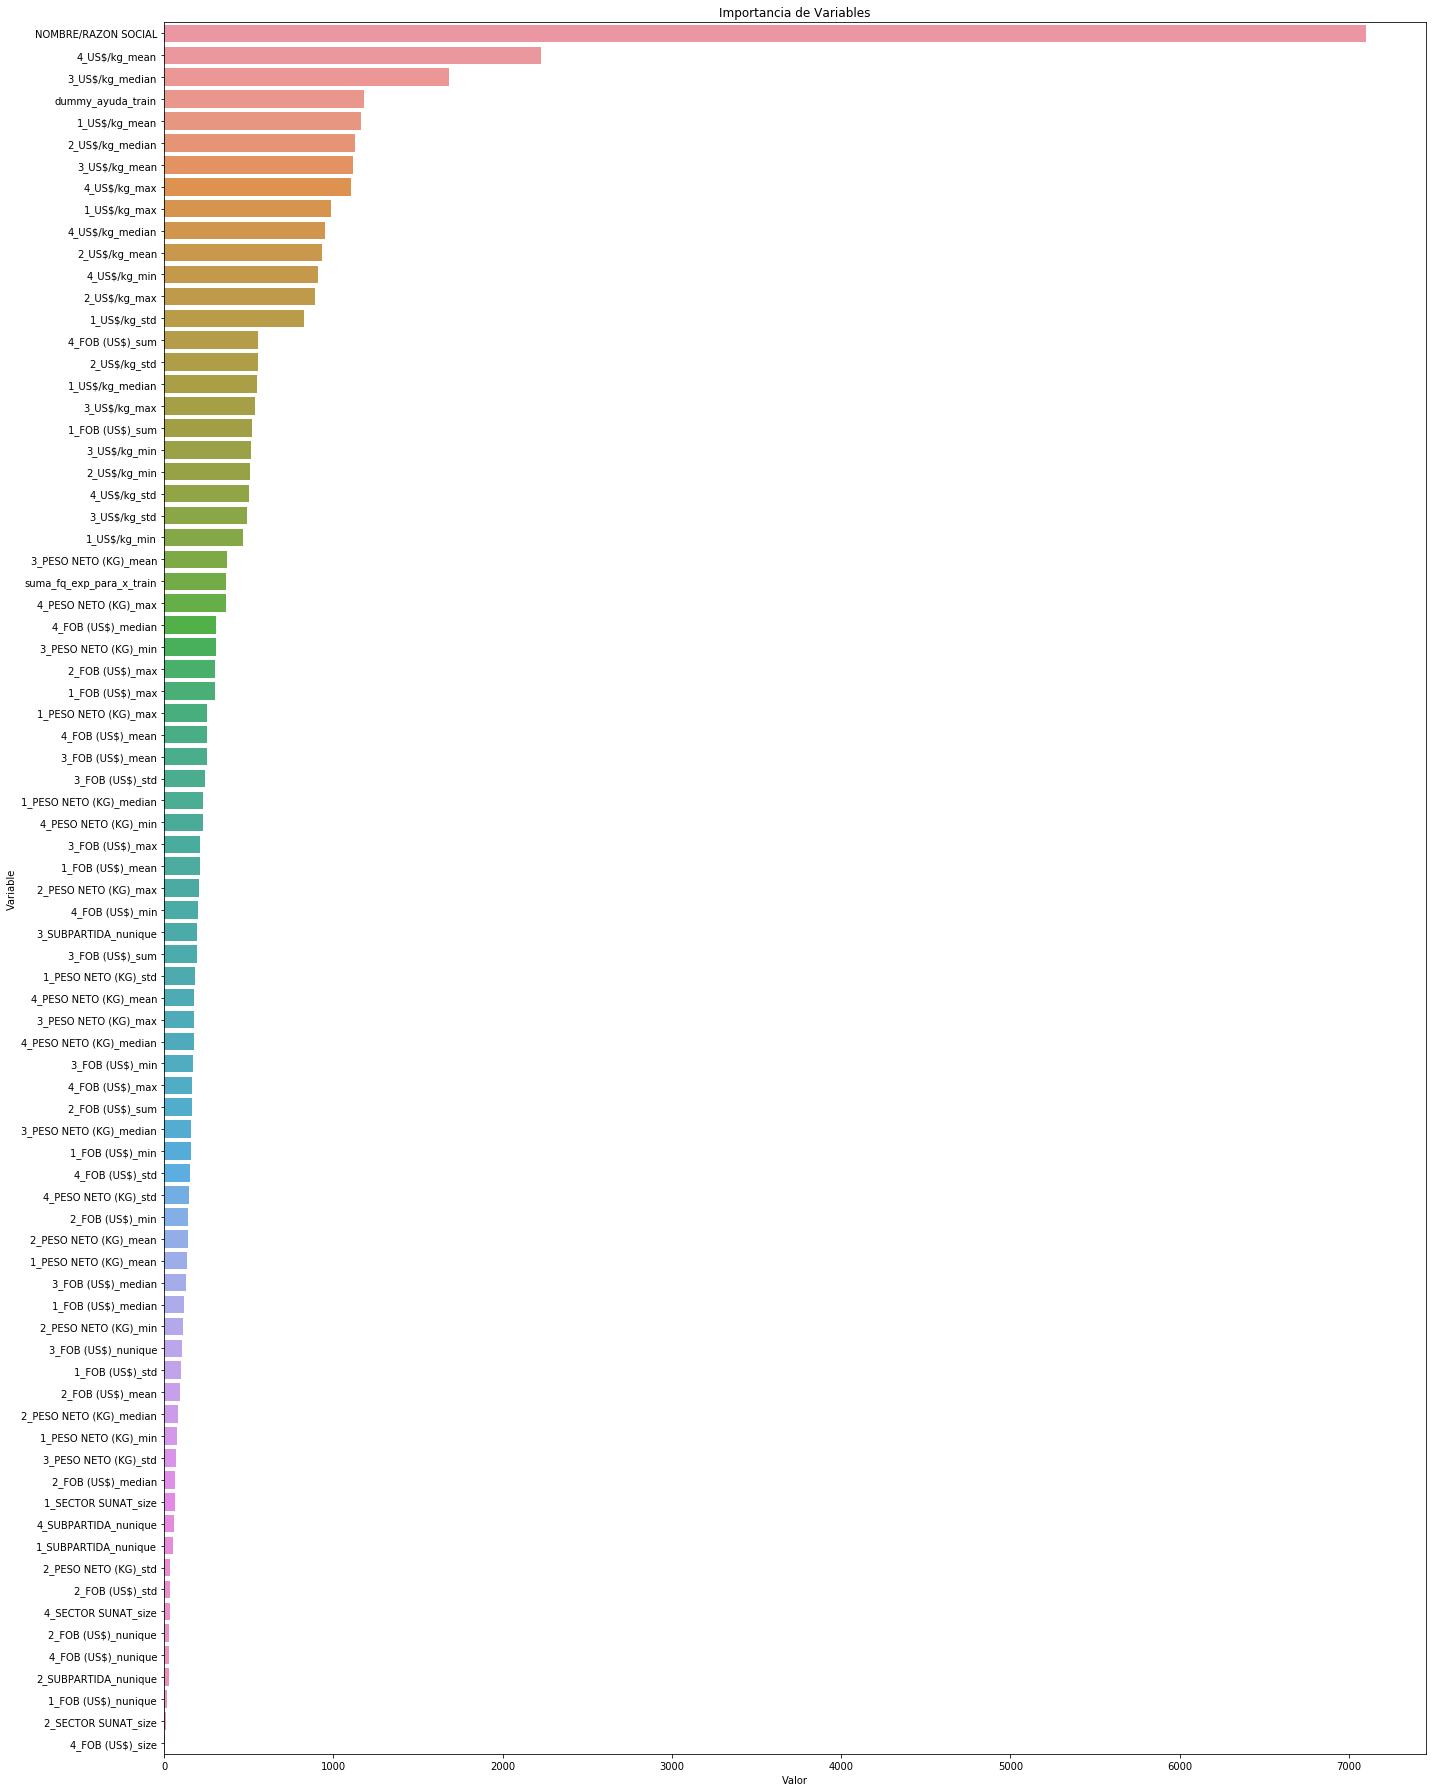

In [166]:
plt.figure(figsize=(20, 25))
sns.barplot(x='Valor',
            y='Variable',
            data=importancia_variable.drop(importancia_variable[importancia_variable['Valor'] < 4].index,axis=0).sort_values(
                by="Valor", ascending=False)
            )
plt.title('Importancia de Variables')
plt.tight_layout()
plt.show()

¿Quienes son los outliers? A lo mejor ustedes pueden darnos una intuición

In [78]:
cross.iloc[to_drop_test]

,NOMBRE/RAZON SOCIAL,fq_exp_enero,fq_exp_feb,fq_exp_marz,fq_exp_abr,fq_exp_may,fq_exp_jun,suma_fq_exp_en_meses_total,suma_fq_exp_para_x_train,suma_fq_exp_para_x_test,dummy_ayuda_train,dummy_ayuda_test
2287,ELECTRICA SANTA ROSA S.A.C.,2,2,2,2,2,2,12,8,8,0,0
4191,KONECRANES PERU SOCIEDAD COMERCIAL DE RESPONSA...,0,0,0,1,0,2,3,1,1,0,0
6608,TERMOCHILCA SA,2,0,2,1,2,1,8,5,5,0,0
575,AMAZON'S LIFE SOCIEDAD ANONIMA CERRADA - AMAZO...,0,1,1,2,1,0,5,4,5,0,0
1047,BOTICAS Y SALUD S.A.C.,1,0,0,1,1,0,3,2,2,0,0
1842,CORPORACION VENYPER 138 S.A.C.,3,6,3,11,7,7,37,23,27,0,0
2287,ELECTRICA SANTA ROSA S.A.C.,2,2,2,2,2,2,12,8,8,0,0
6608,TERMOCHILCA SA,2,0,2,1,2,1,8,5,5,0,0


In [189]:
X_train[['1_US$/kg_mean','2_US$/kg_mean','3_US$/kg_mean','4_US$/kg_mean']].sum(axis=0)

1_US$/kg_mean    270259.861102
2_US$/kg_mean    330740.988423
3_US$/kg_mean    322235.396872
4_US$/kg_mean    362867.563702
dtype: float64

In [204]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
time_series = pivot_table[['1_US$/kg_mean','2_US$/kg_mean','3_US$/kg_mean','4_US$/kg_mean','5_US$/kg_mean','6_US$/kg_mean']].sum(axis=0)
time_series

1_US$/kg_mean    367535.754400
2_US$/kg_mean    985882.198294
3_US$/kg_mean   1015037.799657
4_US$/kg_mean   1715159.690016
5_US$/kg_mean   1129492.850144
6_US$/kg_mean    350565.951275
dtype: float64

In [238]:
data1 = X_train.join(y_train,how='outer')

In [239]:
data1

,1_FOB (US$)_max,2_FOB (US$)_max,3_FOB (US$)_max,4_FOB (US$)_max,1_FOB (US$)_mean,2_FOB (US$)_mean,3_FOB (US$)_mean,4_FOB (US$)_mean,1_FOB (US$)_median,2_FOB (US$)_median,3_FOB (US$)_median,4_FOB (US$)_median,1_FOB (US$)_min,2_FOB (US$)_min,3_FOB (US$)_min,4_FOB (US$)_min,1_FOB (US$)_nunique,2_FOB (US$)_nunique,3_FOB (US$)_nunique,4_FOB (US$)_nunique,1_FOB (US$)_size,2_FOB (US$)_size,3_FOB (US$)_size,4_FOB (US$)_size,1_FOB (US$)_std,2_FOB (US$)_std,3_FOB (US$)_std,4_FOB (US$)_std,1_FOB (US$)_sum,2_FOB (US$)_sum,3_FOB (US$)_sum,4_FOB (US$)_sum,1_FOB (US$)_var,2_FOB (US$)_var,3_FOB (US$)_var,4_FOB (US$)_var,1_MES_nunique,2_MES_nunique,3_MES_nunique,4_MES_nunique,1_PESO NETO (KG)_max,2_PESO NETO (KG)_max,3_PESO NETO (KG)_max,4_PESO NETO (KG)_max,1_PESO NETO (KG)_mean,2_PESO NETO (KG)_mean,3_PESO NETO (KG)_mean,4_PESO NETO (KG)_mean,1_PESO NETO (KG)_median,2_PESO NETO (KG)_median,3_PESO NETO (KG)_median,4_PESO NETO (KG)_median,1_PESO NETO (KG)_min,2_PESO NETO (KG)_min,3_PESO NETO (KG)_min,4_PESO NETO (KG)_min,1_PESO NETO (KG)_std,2_PESO NETO (KG)_std,3_PESO NETO (KG)_std,4_PESO NETO (KG)_std,1_PESO NETO (KG)_var,2_PESO NETO (KG)_var,3_PESO NETO (KG)_var,4_PESO NETO (KG)_var,1_SECTOR SUNAT_nunique,2_SECTOR SUNAT_nunique,3_SECTOR SUNAT_nunique,4_SECTOR SUNAT_nunique,1_SECTOR SUNAT_size,2_SECTOR SUNAT_size,3_SECTOR SUNAT_size,4_SECTOR SUNAT_size,1_SUBPARTIDA_nunique,2_SUBPARTIDA_nunique,3_SUBPARTIDA_nunique,4_SUBPARTIDA_nunique,1_SUBPARTIDA_size,2_SUBPARTIDA_size,3_SUBPARTIDA_size,4_SUBPARTIDA_size,1_US$/kg_max,2_US$/kg_max,3_US$/kg_max,4_US$/kg_max,1_US$/kg_mean,2_US$/kg_mean,3_US$/kg_mean,4_US$/kg_mean,1_US$/kg_median,2_US$/kg_median,3_US$/kg_median,4_US$/kg_median,1_US$/kg_min,2_US$/kg_min,3_US$/kg_min,4_US$/kg_min,1_US$/kg_std,2_US$/kg_std,3_US$/kg_std,4_US$/kg_std,1_US$/kg_var,2_US$/kg_var,3_US$/kg_var,4_US$/kg_var,NOMBRE/RAZON SOCIAL,fq_exp_enero,fq_exp_feb,fq_exp_marz,fq_exp_abr,dummy_ayuda_train,suma_fq_exp_para_x_train,5_US$/kg_mean
0,10000.000000,28000.000000,0.000000,0.000000,10000.000000,28000.000000,0.000000,0.000000,10000.000000,28000.000000,0.000000,0.000000,10000.000000,28000.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,28000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2570.000000,2200.000000,0.000000,0.000000,2570.000000,2200.000000,0.000000,0.000000,2570.000000,2200.000000,0.000000,0.000000,2570.000000,2200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.891051,12.727273,0.000000,0.000000,3.891051,12.727273,0.000000,0.000000,3.891051,12.727273,0.000000,0.000000,3.891051,12.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.787064,1,1,0,0,0,2,0.000000
1,0.000000,0.000000,0.000000,86241.210000,0.000000,0.000000,0.000000,86241.210000,0.000000,0.000000,0.000000,86241.210000,0.000000,0.000000,0.000000,86241.210000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86241.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,57826.500000,0.000000,0.000000,0.000000,57826.500000,0.000000,0.000000,0.000000,57826.500000,0.000000,0.000000,0.000000,57826.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.491379,0.000000,0.000000,0.000000,1.491379,0.000000,0.000000,0.000000,1.491379,0.000000,0.000000,0.000000,1.491379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.475957,0,0,0,1,0,

### Clusterización de clientes

In [249]:
to_kmeans = [*importancia_variable.loc[importancia_variable['Valor'] > 150,'Variable'].values]
to_kmeans.append('5_US$/kg_mean')

In [257]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(data1[to_kmeans])
X_embedded

array([[-16.369335 ,  62.852432 ],
       [ 31.625027 , -47.67853  ],
       [  2.950455 , -52.2986   ],
       ...,
       [  4.9939632,  47.104206 ],
       [-35.031815 , -26.397608 ],
       [-13.542772 , -44.28626  ]], dtype=float32)

In [325]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [339]:
from sklearn.cluster import AgglomerativeClustering

single = AgglomerativeClustering(n_clusters=4,distance_threshold=None, linkage='ward')

In [340]:
single.fit(X_embedded)
single.labels_

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

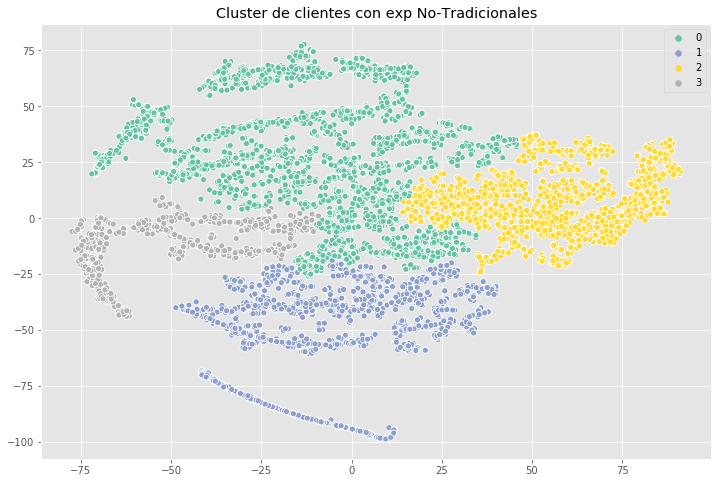

In [341]:
sns.cubehelix_palette(dark=.8, light=.2, as_cmap=True)
plt.figure(figsize=(12,8))
plt.title('Cluster de clientes con exp No-Tradicionales')
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=single.labels_, palette = "Set2")